In [25]:
# %%file importMag.py
import numpy as np
import matplotlib.pyplot as plt
# import warnings
# warnings.filterwarnings('ignore') # ignore warnings: only use this once you are sure things are working
from IPython.html.widgets import *
from fatiando import utils, mesher, gridder
import fatiando.gravmag.prism as prism
from scipy.constants import mu_0

In [26]:
%matplotlib inline

In [57]:
Einc, Edec = 70.,17. # inclination and declination of earth's field in degrees
Bigrf = 54448e-9
Higrf = Bigrf / mu_0

# define the size and orientation of the prism
depth = 1. # depth of burial 

x1, x2 = -2.5, 2.5
y1, y2 = -1e-2, 1e-2
z1, z2 = -1e-2+depth, 1e-2+depth
inc, dec = Einc, Edec
susc = 1.  
Mind = susc*Higrf

Q = 1. #Koenigsberger ratio (Q), ratio of remenant to induced
rMag = Q*Mind
rinc, rdec = 45., 45.

p = mesher.Prism(x1, x2, y1, y2, z1, z2,{'magnetization': utils.ang2vec(rMag, rinc, rdec)})

In [58]:
# define the survey area
nx, ny = 100, 100
surveyArea = (-5., 5., -5., 5.)
z = 0. 
shape = (nx,ny)
xp, yp, zp = gridder.regular(surveyArea,shape, z=z)

In [59]:
comp = 'tf'
irt = 'induced'

if comp is 'bx':
    fieldi = prism.bx(xp,yp,zp,[p],utils.ang2vec(Mind, Einc, Edec))
    fieldr = prism.bx(xp,yp,zp,[p])
elif comp is 'by':
    fieldi = prism.by(xp,yp,zp,[p],utils.ang2vec(Mind, Einc, Edec))
    fieldr = prism.by(xp,yp,zp,[p])
elif comp is 'bz':
    fieldi = prism.bz(xp,yp,zp,[p],utils.ang2vec(Mind, Einc, Edec))
    fieldr = prism.bz(xp,yp,zp,[p])
elif comp is 'tf':
    fieldi = prism.tf(xp,yp,zp,[p],Einc,Edec,utils.ang2vec(Mind, Einc, Edec))
    fieldr = prism.tf(xp,yp,zp,[p],Einc,Edec)

fieldt = fieldi + fieldr

if irt is 'induced':
    field = fieldi
elif irt is 'remnant':
    field = fieldr
elif irt is 'total':
    field = fieldt

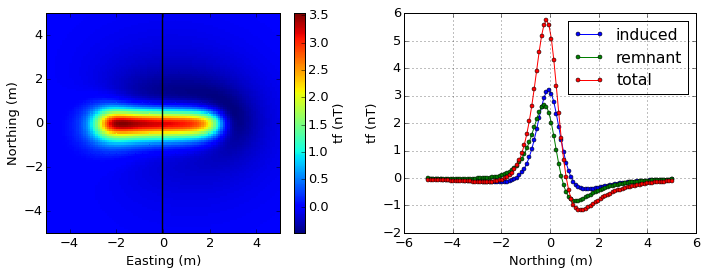

In [60]:
fig,ax = plt.subplots(1,2, figsize = (10, 4))
plt.rcParams.update({'font.size': 13})

# fig.canvas.draw()
im = ax[0].pcolor(xp.reshape(shape),yp.reshape(shape),field.reshape(shape))
ax[0].axis('equal')
ax[0].axis('tight')

ax[0].set_xlabel('Easting (m)')
ax[0].set_ylabel('Northing (m)')
fig.colorbar(im,ax=ax[0],label=comp+' (nT)')

plotDataPoints = False
if plotDataPoints:
    ax[0].plot(xp,yp,'.',color='k')

# plot a line of data
xline = 0.
xvec = xp.reshape(shape)[:,0]
ind = np.min(np.nonzero(abs(xvec - xline) == abs(xvec - xline).min()))
ax[0].plot(xp.reshape(shape)[ind,:],yp.reshape(shape)[ind,:],'k',linewidth=1.4)

ax[1].plot(yp.reshape(shape)[ind,:],fieldi.reshape(shape)[ind,:],'o-',markersize=4)
ax[1].plot(yp.reshape(shape)[ind,:],fieldr.reshape(shape)[ind,:],'o-',markersize=4)
ax[1].plot(yp.reshape(shape)[ind,:],fieldt.reshape(shape)[ind,:],'o-',markersize=4)

ax[1].grid(which='both')
ax[1].set_ylabel(comp+' (nT)')
ax[1].set_xlabel('Northing (m)')
ax[1].legend(['induced','remnant','total'])

plt.tight_layout()